# 회귀_종합실습1_carseat

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


## 2.데이터 준비

### (1) 데이터 준비

In [4]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [5]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교하시오.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [9]:
nfeatures = x_train.shape[1]
nfeatures

18

In [10]:
clear_session()

model = Sequential([Dense(18 ,input_shape = (nfeatures,)  , activation = 'relu' ),
                    Dense(4, activation='relu') ,
                    Dense(1) ] )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 4)                 76        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 423
Trainable params: 423
Non-trainable params: 0
_________________________________________________________________


* 컴파일 + 학습

In [11]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

hist = model.fit(x_train, y_train, epochs = 50, validation_split= 0.2).history

Epoch 1/50
8/8 [==============================] - 1s 49ms/step - loss: 58.0366 - val_loss: 43.2354
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 36.3931 - val_loss: 20.5315
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 13.8699 - val_loss: 9.8056
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 9.6416 - val_loss: 13.5424
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 8.3028 - val_loss: 8.7345
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 6.9331 - val_loss: 8.1368
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 6.6599 - val_loss: 8.0753
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 6.0309 - val_loss: 8.2845
Epoch 9/50
8/8 [==============================] - 0s 10ms/step - loss: 5.8301 - val_loss: 7.9207
Epoch 10/50
8/8 [==============================] - 0s 7ms/step - loss: 5.5118 - val_loss: 7.8284
Epoch 11/50
8/8 [=============

* 학습곡선

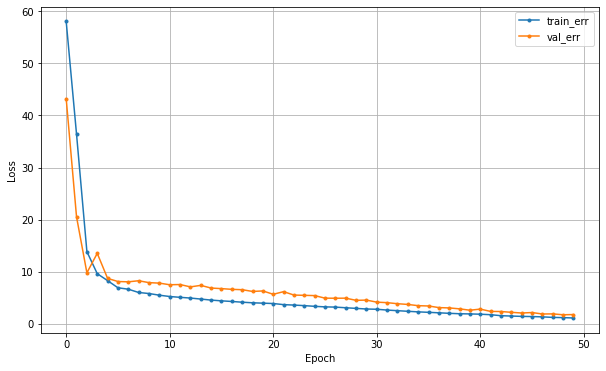

In [12]:
dl_history_plot(hist)

* 검증

In [14]:
pred = model.predict(x_val)

print(mean_squared_error(y_val, pred, squared = False))
print(mean_absolute_error(y_val, pred))
# print(mean_absolute_percentage_error(y_val, pred))

3/3 [==============================] - 0s 19ms/step
1.4036667383518722
1.0987594137191774


### (2) 모델2

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

* 컴파일 + 학습

* 학습곡선

* 검증

### (3) 모델3

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

* 컴파일 + 학습

* 학습곡선

* 검증